<h1>**Preprocessing on German Credit Risk data set**</h1>

### Stages:
- 1.) Imports
- 2.) Read the data
- 3.) Visualize the data
- 

## 1.) Imports

In [1]:
import numpy as np
import pandas as pd

from scipy import stats 
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from colorsetup import colors, palette

## 2.) Read the data

In [2]:
gcr_data = pd.read_csv("german_credit_data.csv", index_col=0)

In [3]:
gcr_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
gcr_data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [5]:
gcr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [6]:
gcr_data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
gcr_data['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

Credit Amount means the maximum amount that Lender is committed to lend

In [8]:
feature_cols = [x for x in gcr_data.columns if x!='Risk']
X = gcr_data[feature_cols]
y = gcr_data['Risk']

In [9]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


## 3.) Visualize the data

<AxesSubplot:>

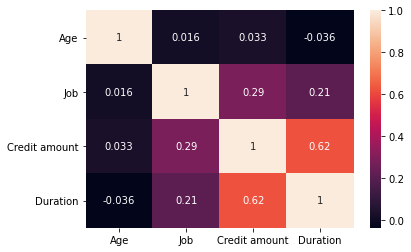

In [10]:
sns.heatmap(gcr_data.corr(), annot=True)

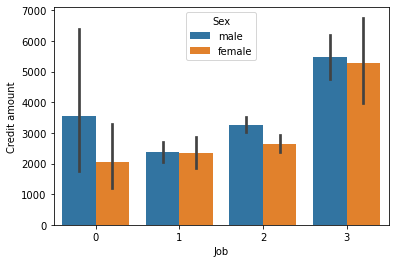

In [11]:
sns.barplot(x="Job", y="Credit amount", hue="Sex", data=gcr_data);

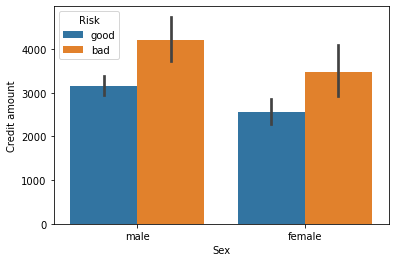

In [12]:
sns.barplot(x="Sex", y="Credit amount", hue="Risk", data=gcr_data);

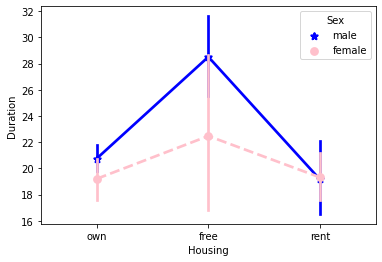

In [13]:
sns.pointplot(x="Housing", y="Duration", hue="Sex", data=gcr_data,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

In [14]:
y_tar = (gcr_data['Risk']=='good').astype(int)
correlations = gcr_data[list(gcr_data.columns[:-1])].corrwith(y_tar)
correlations.sort_values(inplace=True)
correlations

Duration        -0.214927
Credit amount   -0.154739
Job             -0.032735
Age              0.091127
dtype: float64

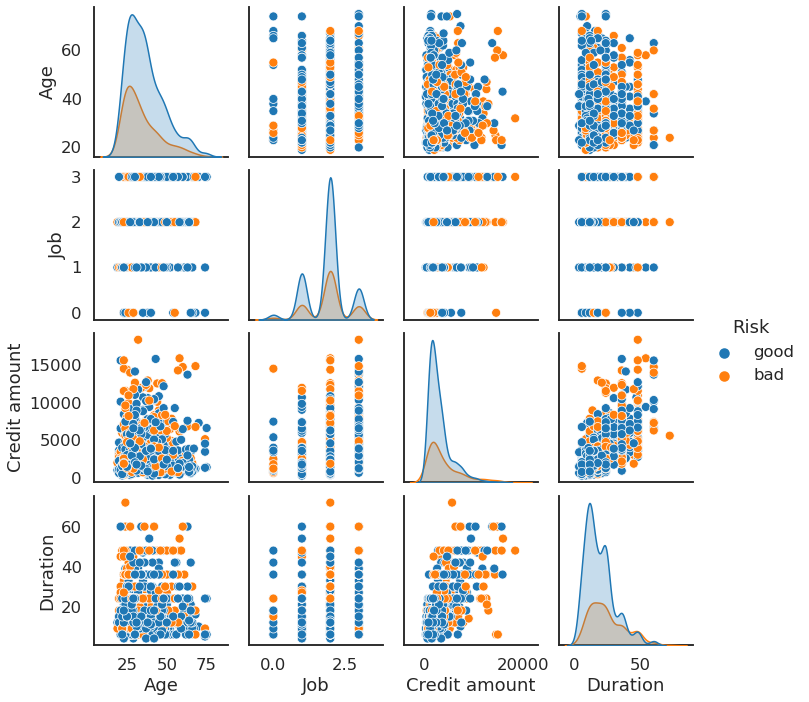

In [15]:
sns.set_context('talk')
#sns.set_palette(palette)
sns.set_style('white')

sns.pairplot(gcr_data, hue='Risk')

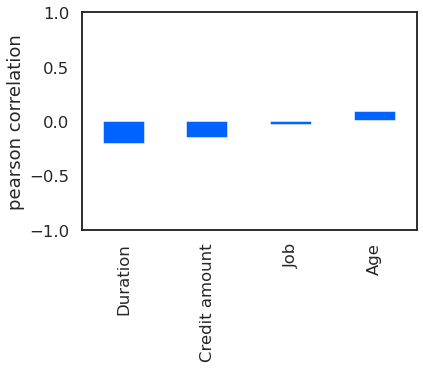

In [16]:
ax = correlations.plot(kind='bar', color=colors[0])
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

### Feature Engineering

#### Label encoding categorical variables

In [17]:
cat_cols = gcr_data.columns[gcr_data.dtypes == 'O']
num_cols = gcr_data.columns[gcr_data.dtypes == 'int']
#ordinal_cols = [ 'Housing', 'Saving accounts', 'Checking account'] 
binary_cols = ['Sex', 'Risk']
#nominal_cols = ['Purpose']
nominal_cols = ['Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [18]:
print(cat_cols)

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')


In [19]:
replace_map = {'Housing': {'free': 1, 'rent': 2, 'own': 3}}
gcr_data.replace(replace_map, inplace=True)

In [20]:
replace_map = {'Saving accounts': {'little': 1, 'moderate': 2, 'quite rich': 3, 'rich': 4}}
gcr_data.replace(replace_map, inplace=True)

In [21]:
replace_map = {'Checking account': {'little': 1, 'moderate': 2, 'rich': 3}}
gcr_data.replace(replace_map, inplace=True)

In [22]:
gcr_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,3,NaN,1.0,1169,6,radio/TV,good
1,22,female,2,3,1.0,2.0,5951,48,radio/TV,bad
2,49,male,1,3,1.0,NaN,2096,12,education,good
3,45,male,2,1,1.0,1.0,7882,42,furniture/equipment,good
4,53,male,2,1,1.0,1.0,4870,24,car,bad


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in binary_cols:
    gcr_data[column] = le.fit_transform(gcr_data[column])

In [24]:
gcr_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,3,NaN,1.0,1169,6,radio/TV,1
1,22,0,2,3,1.0,2.0,5951,48,radio/TV,0
2,49,1,1,3,1.0,NaN,2096,12,education,1
3,45,1,2,1,1.0,1.0,7882,42,furniture/equipment,1
4,53,1,2,1,1.0,1.0,4870,24,car,0


In [25]:
gcr_data = pd.get_dummies(gcr_data, columns=nominal_cols, drop_first=False)

In [26]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Risk,Housing_1,Housing_2,Housing_3,Saving accounts_1.0,...,Checking account_2.0,Checking account_3.0,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1169,6,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,0,2,5951,48,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
2,49,1,1,2096,12,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,45,1,2,7882,42,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,53,1,2,4870,24,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [27]:
gcr_data.nunique()

Age                             53
Sex                              2
Job                              4
Credit amount                  921
Duration                        33
Risk                             2
Housing_1                        2
Housing_2                        2
Housing_3                        2
Saving accounts_1.0              2
Saving accounts_2.0              2
Saving accounts_3.0              2
Saving accounts_4.0              2
Checking account_1.0             2
Checking account_2.0             2
Checking account_3.0             2
Purpose_business                 2
Purpose_car                      2
Purpose_domestic appliances      2
Purpose_education                2
Purpose_furniture/equipment      2
Purpose_radio/TV                 2
Purpose_repairs                  2
Purpose_vacation/others          2
dtype: int64

<h2>Categorical Missing Values Imputation</h2>

https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

### 1) SimpleImputer

### 2) IterativeImputer

In [28]:
feature_cols = [x for x in gcr_data.columns if x!='Risk']
X = gcr_data[feature_cols]
y = gcr_data['Risk']

In [29]:
X.head()

,Age,Sex,Job,Credit amount,Duration,Housing_1,Housing_2,Housing_3,Saving accounts_1.0,Saving accounts_2.0,...,Checking account_2.0,Checking account_3.0,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1169,6,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22,0,2,5951,48,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,1,2096,12,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,1,2,7882,42,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,1,2,4870,24,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
# define imputer
imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

In [31]:
# fit on the dataset
imputer.fit(X)

IterativeImputer(estimator=BayesianRidge())

In [32]:
# transform the dataset
Xtrans = imputer.transform(X)

In [33]:
X = pd.DataFrame(Xtrans, columns=X.columns)

In [34]:
X.isnull().sum()

Age                            0
Sex                            0
Job                            0
Credit amount                  0
Duration                       0
Housing_1                      0
Housing_2                      0
Housing_3                      0
Saving accounts_1.0            0
Saving accounts_2.0            0
Saving accounts_3.0            0
Saving accounts_4.0            0
Checking account_1.0           0
Checking account_2.0           0
Checking account_3.0           0
Purpose_business               0
Purpose_car                    0
Purpose_domestic appliances    0
Purpose_education              0
Purpose_furniture/equipment    0
Purpose_radio/TV               0
Purpose_repairs                0
Purpose_vacation/others        0
dtype: int64

#### Log transforming skew variables

In [35]:
X.dtypes

Age                            float64
Sex                            float64
Job                            float64
Credit amount                  float64
Duration                       float64
Housing_1                      float64
Housing_2                      float64
Housing_3                      float64
Saving accounts_1.0            float64
Saving accounts_2.0            float64
Saving accounts_3.0            float64
Saving accounts_4.0            float64
Checking account_1.0           float64
Checking account_2.0           float64
Checking account_3.0           float64
Purpose_business               float64
Purpose_car                    float64
Purpose_domestic appliances    float64
Purpose_education              float64
Purpose_furniture/equipment    float64
Purpose_radio/TV               float64
Purpose_repairs                float64
Purpose_vacation/others        float64
dtype: object

In [36]:
#num_cols = X.columns[X.dtypes == 'float']
num_cols = X.columns
num_cols

Index(['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Housing_1',
       'Housing_2', 'Housing_3', 'Saving accounts_1.0', 'Saving accounts_2.0',
       'Saving accounts_3.0', 'Saving accounts_4.0', 'Checking account_1.0',
       'Checking account_2.0', 'Checking account_3.0', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [37]:
skew_vals = X[num_cols].skew()

skew_limit = 0.75
skew_cols = (skew_vals.
            sort_values(ascending=False)
            .to_frame()
            .rename(columns={0:'Skew'})
            .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
Purpose_domestic appliances,8.977035
Purpose_vacation/others,8.977035
Purpose_repairs,6.527236
Saving accounts_4.0,4.235274
Purpose_education,3.748866
Checking account_3.0,3.602662
Saving accounts_3.0,3.602662
Purpose_business,2.727454
Saving accounts_2.0,2.616121
Housing_1,2.529729


In [38]:
for col in skew_cols.index.values:
    X[col] =X[col].apply(np.log1p)

In [39]:
X.head()

,Age,Sex,Job,Credit amount,Duration,Housing_1,Housing_2,Housing_3,Saving accounts_1.0,Saving accounts_2.0,...,Checking account_2.0,Checking account_3.0,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,4.219508,0.693147,2.0,7.064759,1.945910,0.000000,0.0,0.693147,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.0
1,3.135494,0.000000,2.0,8.691483,3.891820,0.000000,0.0,0.693147,1.0,0.0,...,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.0
2,3.912023,0.693147,1.0,7.648263,2.564949,0.000000,0.0,0.693147,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.693147,0.000000,0.000000,0.0,0.0
3,3.828641,0.693147,2.0,8.972464,3.761200,0.693147,0.0,0.000000,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.693147,0.000000,0.0,0.0
4,3.988984,0.693147,2.0,8.491055,3.218876,0.693147,0.0,0.000000,1.0,0.0,...,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [40]:
X.isnull().sum()

Age                            0
Sex                            0
Job                            0
Credit amount                  0
Duration                       0
Housing_1                      0
Housing_2                      0
Housing_3                      0
Saving accounts_1.0            0
Saving accounts_2.0            0
Saving accounts_3.0            0
Saving accounts_4.0            0
Checking account_1.0           0
Checking account_2.0           0
Checking account_3.0           0
Purpose_business               0
Purpose_car                    0
Purpose_domestic appliances    0
Purpose_education              0
Purpose_furniture/equipment    0
Purpose_radio/TV               0
Purpose_repairs                0
Purpose_vacation/others        0
dtype: int64

In [41]:
gcr_data_imputed = pd.concat([X, y], axis=1)

In [42]:
outputfile = 'gcr_data_imputed2.csv'
gcr_data_imputed.to_csv(outputfile, index=False)

#### New feature

In [43]:
gcr_data_imputed['Credit_amount/duration'] = gcr_data_imputed['Credit amount']/gcr_data_imputed['Duration']

In [145]:
outputfile = 'gcr_processed.csv'
gcr_data_imputed.to_csv(outputfile, index=False)